In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing
from sklearn import feature_selection
from sklearn import ensemble
from sklearn.feature_selection import  chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve

from sklearn import linear_model
from sklearn import tree
from sklearn import neighbors
from sklearn import naive_bayes

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

%matplotlib inline

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data[data.isna().sum(axis=1)<101].shape

(70993, 133)

In [4]:
data[data.isna().sum(axis=1)<100].shape

(66576, 133)

In [5]:
data[data.isna().sum(axis=1)<3].shape

(60423, 133)

So We consider only 2 Nan in a Row

In [6]:
data2= data[data.isna().sum(axis=1)<3]

In [7]:
data.shape

(114321, 133)

In [8]:
data2.shape

(60423, 133)

In [9]:
data.isna().sum()

ID            0
target        0
v1        49832
v2        49796
v3         3457
v4        49796
v5        48624
v6        49832
v7        49832
v8        48619
v9        49851
v10          84
v11       49836
v12          86
v13       49832
v14           4
v15       49836
v16       49895
v17       49796
v18       49832
v19       49843
v20       49840
v21         611
v22         500
v23       50675
v24           0
v25       48619
v26       49832
v27       49832
v28       49832
          ...  
v102      51316
v103      49832
v104      49832
v105      48658
v106      49796
v107          3
v108      48624
v109      48624
v110          0
v111      49832
v112        382
v113      55304
v114         30
v115      49895
v116      49836
v117      48624
v118      49843
v119      50680
v120      49836
v121      49840
v122      49851
v123      50678
v124      48619
v125         77
v126      49832
v127      49832
v128      48624
v129          0
v130      49843
v131      49895
Length: 133, dtype: int6

In [10]:
X= data.iloc[:,2:]
y= data.iloc[:,1:2]

In [11]:
X_nr = data2.iloc[:,2:]
y_nr = data2.iloc[:,1:2]

In [12]:
X.drop(columns=["v30","v113","v102","v105"],inplace=True)
X_nr.drop(columns=["v30","v113","v102","v105"],inplace=True)

### Finding Categorical columns 

In [13]:
cat_list=[]
for i in X.columns:
    a=X[i].value_counts().shape
    if a[0]<50 or X[i].value_counts().iloc[1]>500:
        cat_list.append(i)

In [14]:
print("Total Categorical Columns =",len(cat_list))
print(*cat_list)

Total Categorical Columns = 21
v3 v22 v24 v31 v38 v47 v52 v56 v62 v66 v71 v72 v74 v75 v79 v91 v107 v110 v112 v125 v129


In [15]:
numeric=["int16","int32","int64","float16","float32","float64"]
numcols=X.select_dtypes(include=numeric).columns.values
strcols=X.select_dtypes(include="object").columns.values

print("Numeric Columns =",len(numcols))
print("String Columns =",len(strcols))

Numeric Columns = 110
String Columns = 17


In [16]:
num_cols = [ i for i in numcols if i not in cat_list]

print("Only Contineus Numeric Columns = ",len(num_cols))

Only Contineus Numeric Columns =  106


In [17]:
Xn= X[num_cols]

Xn_med =Xn.iloc[:,:]
Xn_mn =Xn.iloc[:,:]
Xn_z =Xn.iloc[:,:]

Xn_med.fillna(Xn.median(),inplace=True)
Xn_mn.fillna(Xn.mean(),inplace=True)
Xn_z.fillna(0,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


#### Fill with Zero - Median - Mean

In [18]:
Xnr= X_nr[num_cols]

Xnr_med =Xnr.iloc[:,:]
Xnr_mn =Xnr.iloc[:,:]
Xnr_z =Xnr.iloc[:,:]

Xnr_med.fillna(Xnr.median(),inplace=True)
Xnr_mn.fillna(Xnr.mean(),inplace=True)
Xnr_z.fillna(0,inplace=True)

In [19]:
Xntrain,Xntest,yntrain,yntest=model_selection.train_test_split(Xn_med,y,test_size=.25,random_state=11)

Xnrtrain,Xnrtest,ynrtrain,ynrtest=model_selection.train_test_split(Xnr_med,y_nr,test_size=.25,random_state=11)

### Variance Threshold of Both Numerical columns 

In [20]:
varthobj=feature_selection.VarianceThreshold((.8 * (1 - .8)))

varthobj1=feature_selection.VarianceThreshold((.8 * (1 - .8)))
varthobj2=feature_selection.VarianceThreshold((.8 * (1 - .8)))

varthobj1.fit(Xntrain)
varthobj2.fit(Xnrtrain)

a = varthobj.fit_transform(Xntrain)
b = varthobj.fit_transform(Xnrtrain)

print(Xntrain.shape,Xnrtrain.shape)
print(a.shape,b.shape)

(85740, 106) (45317, 106)
(85740, 99) (45317, 102)


In [21]:
Xntrain = Xntrain[Xntrain.columns[varthobj1.get_support(indices=True)]]
Xnrtrain = Xnrtrain[Xnrtrain.columns[varthobj2.get_support(indices=True)]]

### Feature Selection 

#### ANOVA TEST 

In [22]:
skbobj1=feature_selection.SelectKBest(feature_selection.f_classif,k=10)
skbobj1.fit_transform(Xntrain,np.array(yntrain).ravel())
s1=set(Xntrain.columns[skbobj1.get_support()])
s1

{'v10', 'v114', 'v119', 'v12', 'v123', 'v14', 'v21', 'v34', 'v4', 'v50'}

#### mutual_info_classif

In [23]:
skbobj2=feature_selection.SelectKBest(feature_selection.mutual_info_classif,k=10)
skbobj2.fit_transform(Xntrain,np.array(yntrain).ravel())
s2=set(Xntrain.columns[skbobj2.get_support()])
s2

{'v10', 'v103', 'v104', 'v114', 'v12', 'v14', 'v20', 'v21', 'v29', 'v50'}

#### Select From Model

In [24]:
sfmobj=feature_selection.SelectFromModel(ensemble.RandomForestClassifier(n_estimators=10))
sfmobj.fit_transform(Xntrain,np.array(yntrain).ravel())
s4=set(Xntrain.columns[sfmobj.get_support()])
s4

{'v10', 'v114', 'v12', 'v14', 'v21', 'v34', 'v40', 'v50'}

In [26]:
all_union = ((s1.union(s2))).union(s4)
print(*all_union)

v29 v119 v104 v40 v4 v114 v50 v12 v103 v21 v20 v10 v14 v34 v123


In [27]:
len(all_union)

15

In [28]:
common = ((s1.intersection(s2))).intersection(s4)

In [29]:
common

{'v10', 'v114', 'v12', 'v14', 'v21', 'v50'}

In [30]:
def f_selection(Xtrain,ytrain):
    
    # ANOVA TEST
    skbobj1=feature_selection.SelectKBest(feature_selection.f_classif,k=10)
    skbobj1.fit_transform(Xtrain,np.array(ytrain).ravel())
    s1=set(Xtrain.columns[skbobj1.get_support()])
    
    # Mutual_info_classif
    skbobj2=feature_selection.SelectKBest(feature_selection.mutual_info_classif,k=10)
    skbobj2.fit_transform(Xtrain,np.array(ytrain).ravel())
    s2=set(Xtrain.columns[skbobj2.get_support()])
    
    
    # Select From Model
    sfmobj=feature_selection.SelectFromModel(ensemble.RandomForestClassifier(n_estimators=10))
    sfmobj.fit_transform(Xtrain,np.array(ytrain).ravel())
    s3=set(Xtrain.columns[sfmobj.get_support()])
    
    all_union = ((s1.union(s2)).union(s3))
    common = ((s1.intersection(s2)).intersection(s3))
    
    return s1,s2,s3,common,all_union

In [31]:
ns1,ns2,ns3,ncommon,nall_union = f_selection(Xnrtrain,ynrtrain)

In [32]:
print(ns1)
print(ns2)
print(ns3)

print(ncommon)
print(nall_union)

{'v119', 'v21', 'v4', 'v114', 'v50', 'v12', 'v10', 'v14', 'v34', 'v123'}
{'v29', 'v64', 'v50', 'v123', 'v13', 'v45', 'v10', 'v14', 'v42', 'v88'}
{'v40', 'v4', 'v2', 'v12', 'v6', 'v120', 'v10', 'v68', 'v85', 'v70', 'v114', 'v50', 'v7', 'v21', 'v28', 'v37', 'v18', 'v14', 'v34', 'v88'}
{'v50', 'v14', 'v10'}
{'v29', 'v119', 'v40', 'v88', 'v68', 'v85', 'v4', 'v70', 'v114', 'v50', 'v2', 'v12', 'v13', 'v6', 'v42', 'v7', 'v21', 'v28', 'v64', 'v37', 'v120', 'v45', 'v10', 'v18', 'v14', 'v34', 'v123'}


In [33]:
def final_selector(Xtrain,Xtest,ytrain,ytest,cols):
    aucscores={}
    for col in cols:
        model=ensemble.RandomForestClassifier(n_estimators=10)
        model.fit(Xtrain[col].to_frame(),np.array(ytrain).ravel())
        testp=model.predict(Xtest[col].to_frame())
        aucscores[col]=np.round(metrics.roc_auc_score(ytest,testp),4)
    print(aucscores)
    
    aucser=pd.Series(aucscores)
    selected_cols = list(aucser.sort_values(ascending=False)[:10].index) # Top 10 Columns
    
    return selected_cols

## Top 10 feature selection of Numerical-1 

In [34]:
final_selector(Xntrain,Xntest,yntrain,yntest,all_union)

{'v29': 0.5156, 'v119': 0.5144, 'v104': 0.5203, 'v40': 0.5073, 'v4': 0.5212, 'v114': 0.5165, 'v50': 0.53, 'v12': 0.5361, 'v103': 0.5163, 'v21': 0.5163, 'v20': 0.5132, 'v10': 0.5012, 'v14': 0.497, 'v34': 0.5146, 'v123': 0.5221}


['v12', 'v50', 'v123', 'v4', 'v104', 'v114', 'v21', 'v103', 'v29', 'v34']

## Top 10 feature selection of Numerical-2

In [35]:
final_selector(Xnrtrain,Xnrtest,ynrtrain,ynrtest,nall_union)

{'v29': 0.5249, 'v119': 0.5226, 'v40': 0.5096, 'v88': 0.5243, 'v68': 0.5235, 'v85': 0.5236, 'v4': 0.5284, 'v70': 0.5095, 'v114': 0.5164, 'v50': 0.5404, 'v2': 0.5294, 'v12': 0.5239, 'v13': 0.5282, 'v6': 0.5268, 'v42': 0.5268, 'v7': 0.53, 'v21': 0.517, 'v28': 0.5052, 'v64': 0.5278, 'v37': 0.5142, 'v120': 0.5265, 'v45': 0.5209, 'v10': 0.503, 'v18': 0.5021, 'v14': 0.4984, 'v34': 0.5104, 'v123': 0.5299}


['v50', 'v7', 'v123', 'v2', 'v4', 'v13', 'v64', 'v42', 'v6', 'v120']

In [36]:
dual_union = list(set(['v12', 'v50', 'v4', 'v123', 'v101', 'v103', 'v7', 'v49', 'v21', 'v29','v50', 'v4', 'v2', 'v123', 'v64', 'v29', 'v12', 'v120', 'v13', 'v45']))

In [37]:
len(dual_union)

15

## Categorical columns Label encoding 

In [38]:
train_cat1=data[cat_list]
train_cat1 = train_cat1.apply(lambda x:x.fillna(x.value_counts().index[0]))

Xcat1=train_cat1.apply(LabelEncoder().fit_transform)
X1_ctrain,X1_ctest,y1train,y1test=model_selection.train_test_split(Xcat1,y,test_size=.25,random_state=11)

In [39]:
print(X1_ctrain.shape)
print(X1_ctest.shape)

print(y1train.shape)
print(y1test.shape)

(85740, 21)
(28581, 21)
(85740, 1)
(28581, 1)


In [40]:
train_cat2=data2[cat_list]
train_cat2 = train_cat2.apply(lambda x:x.fillna(x.value_counts().index[0]))

Xcat2=train_cat2.apply(LabelEncoder().fit_transform)
X2_ctrain,X2_ctest,y2train,y2test=model_selection.train_test_split(Xcat2,y_nr,test_size=.25,random_state=11)

In [41]:
print(X2_ctrain.shape)
print(X2_ctest.shape)

print(y2train.shape)
print(y2test.shape)

(45317, 21)
(15106, 21)
(45317, 1)
(15106, 1)


In [42]:
nc1=varthobj.fit_transform(X1_ctrain)
print(nc1.shape)
print(X1_ctrain.shape)

(85740, 19)
(85740, 21)


In [43]:
nc2=varthobj.fit_transform(X2_ctrain)
print(nc2.shape)
print(X2_ctrain.shape)

(45317, 19)
(45317, 21)


### Variance Threshold of Both Categorical columns 

In [44]:
varthobj11=feature_selection.VarianceThreshold((.8 * (1 - .8)))
varthobj22=feature_selection.VarianceThreshold((.8 * (1 - .8)))

varthobj11.fit(X1_ctrain)
varthobj22.fit(X2_ctrain)


X1_ctrain = X1_ctrain[X1_ctrain.columns[varthobj11.get_support(indices=True)]]
X2_ctrain = X2_ctrain[X2_ctrain.columns[varthobj11.get_support(indices=True)]]

In [45]:
print(X1_ctrain.shape)
print(X2_ctrain.shape)

(85740, 19)
(45317, 19)


### Selecting Categorical Feature 1

In [46]:
ac1,ac2,ac3,acommon,aall_union = f_selection(X1_ctrain,y1train)

In [47]:
print(ac1)
print(ac2)
print(ac3)

print(acommon)
print(aall_union)

{'v56', 'v31', 'v72', 'v62', 'v38', 'v129', 'v66', 'v110', 'v47', 'v79'}
{'v56', 'v22', 'v31', 'v72', 'v62', 'v129', 'v66', 'v110', 'v47', 'v79'}
{'v56', 'v22', 'v112', 'v52', 'v125'}
{'v56'}
{'v56', 'v22', 'v31', 'v72', 'v125', 'v129', 'v62', 'v38', 'v112', 'v66', 'v52', 'v110', 'v47', 'v79'}


In [48]:
final_selector(X1_ctrain,X1_ctest,y1train,y1test,aall_union)

{'v56': 0.5, 'v22': 0.5108, 'v31': 0.5, 'v72': 0.5, 'v125': 0.4999, 'v129': 0.5, 'v62': 0.5, 'v38': 0.5, 'v112': 0.5, 'v66': 0.5, 'v52': 0.5, 'v110': 0.5, 'v47': 0.5, 'v79': 0.5}


['v22', 'v79', 'v47', 'v110', 'v52', 'v66', 'v112', 'v38', 'v62', 'v129']

### Selecting Categorical Feature 2

In [49]:
bc1,bc2,bc3,bcommon,ball_union = f_selection(X2_ctrain,y2train)

In [50]:
print(bc1)
print(bc2)
print(bc3)

print(bcommon)
print(ball_union)

{'v56', 'v31', 'v72', 'v62', 'v38', 'v129', 'v66', 'v110', 'v47', 'v79'}
{'v56', 'v22', 'v31', 'v72', 'v62', 'v129', 'v66', 'v110', 'v47', 'v79'}
{'v56', 'v22', 'v112', 'v52', 'v125'}
{'v56'}
{'v56', 'v22', 'v31', 'v72', 'v125', 'v129', 'v62', 'v38', 'v112', 'v66', 'v52', 'v110', 'v47', 'v79'}


In [51]:
final_selector(X2_ctrain,X2_ctest,y2train,y2test,ball_union)

{'v56': 0.5, 'v22': 0.5116, 'v31': 0.5, 'v72': 0.5, 'v125': 0.5, 'v129': 0.5, 'v62': 0.5, 'v38': 0.5, 'v112': 0.5, 'v66': 0.5, 'v52': 0.5, 'v110': 0.5, 'v47': 0.5, 'v79': 0.5}


['v22', 'v79', 'v47', 'v110', 'v52', 'v66', 'v112', 'v38', 'v62', 'v129']

## Merging Categorical and Numerical Columns 

In [52]:
x1=Xn_med[['v12', 'v50', 'v4', 'v123', 'v101', 'v103', 'v7', 'v49', 'v21', 'v29']]
x1_c=Xcat1[['v66', 'v129', 'v31', 'v56', 'v72', 'v79', 'v112', 'v125', 'v110',]]
y1=y

In [53]:
x1_m=x1.join(x1_c)

In [54]:
x1_m.shape

(114321, 19)

In [55]:
def reports(ytrue,predicted):
    print("Accuracy : {}".format(metrics.accuracy_score(ytrue,predicted)))
    print("Precision : {}".format(metrics.precision_score(ytrue,predicted)))
    print("Recall : {}".format(metrics.recall_score(ytrue,predicted)))
    print("Logloss : {}".format(metrics.log_loss(ytrue,predicted)))
    print("AUC : {}".format(metrics.roc_auc_score(ytrue,predicted)))
    print("Confusion Matrix : \n{}".format(metrics.confusion_matrix(ytrue,predicted)))

In [56]:
def modelstats1(Xtrain,Xtest,ytrain,ytest):
    stats=[]
    modelnames=["LR","DecisionTree","KNN","NB"]
    models=list()
    models.append(linear_model.LogisticRegression())
    models.append(tree.DecisionTreeClassifier())
    models.append(neighbors.KNeighborsClassifier())
    models.append(naive_bayes.GaussianNB())
    for name,model in zip(modelnames,models):
        if name=="KNN":
            k=[l for l in range(5,17,2)]
            grid={"n_neighbors":k}
            grid_obj = model_selection.GridSearchCV(estimator=model,param_grid=grid,scoring="f1")
            grid_fit =grid_obj.fit(Xtrain,ytrain)
            model = grid_fit.best_estimator_
            model.fit(Xtrain,ytrain)
            name=name+"("+str(grid_fit.best_params_["n_neighbors"])+")"
            print(grid_fit.best_params_)
        else:
            model.fit(Xtrain,ytrain)
        trainprediction=model.predict(Xtrain)
        testprediction=model.predict(Xtest)
        scores=list()
        scores.append(name+"-train")
        scores.append(metrics.accuracy_score(ytrain,trainprediction))
        scores.append(metrics.precision_score(ytrain,trainprediction))
        scores.append(metrics.recall_score(ytrain,trainprediction))
        scores.append(metrics.roc_auc_score(ytrain,trainprediction))
        stats.append(scores)
        scores=list()
        scores.append(name+"-test")
        scores.append(metrics.accuracy_score(ytest,testprediction))
        scores.append(metrics.precision_score(ytest,testprediction))
        scores.append(metrics.recall_score(ytest,testprediction))
        scores.append(metrics.roc_auc_score(ytest,testprediction))
        stats.append(scores)
    
    colnames=["MODELNAME","ACCURACY","PRECISION","RECALL","AUC"]
    return pd.DataFrame(stats,columns=colnames)

In [57]:
X_all_train,X_all_test,ytrain,ytest=model_selection.train_test_split(x1_m,y1,test_size=.25,random_state=11)

In [58]:
model=ensemble.RandomForestClassifier(n_estimators=10)
model.fit(X_all_train,np.array(ytrain).ravel())
testp=model.predict(X_all_test)
print("For Random Forest\n\n")
reports(ytest,testp)

For Random Forest


Accuracy : 0.7453553059724992
Precision : 0.80479668960858
Recall : 0.8777342850564126
Logloss : 8.795245482701086
AUC : 0.6022082436059808
Confusion Matrix : 
[[ 2243  4623]
 [ 2655 19060]]


In [59]:
nv = GaussianNB()
nv.fit(X_all_train,np.array(ytrain).ravel())
testp = nv.predict(X_all_test)
print("For Naive Bayes\n\n")
reports(ytest,testp)

For Naive Bayes


Accuracy : 0.5702389699450684
Precision : 0.8708713431896823
Recall : 0.5099700667741193
Logloss : 14.843466057789033
AUC : 0.6354103173952157
Confusion Matrix : 
[[ 5224  1642]
 [10641 11074]]


In [60]:
modelstats1(X_all_train,X_all_test,ytrain,ytest)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimat

{'n_neighbors': 15}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,MODELNAME,ACCURACY,PRECISION,RECALL,AUC
0,LR-train,0.765769,0.769875,0.987719,0.522072
1,LR-test,0.762814,0.767805,0.986000,0.521474
2,DecisionTree-train,0.999988,1.000000,0.999985,0.999992
3,DecisionTree-test,0.685245,0.798526,0.783376,0.579133
4,KNN(15)-train,0.778272,0.795350,0.954491,0.584787
5,KNN(15)-test,0.750184,0.778500,0.938107,0.546974
6,NB-train,0.570655,0.870649,0.512449,0.634565
7,NB-test,0.570239,0.870871,0.509970,0.635410


In [61]:
def naive_randomf(x,y):
    X_all_train,X_all_test,ytrain,ytest=model_selection.train_test_split(x,y,test_size=.25,random_state=11)
    
    model=ensemble.RandomForestClassifier(n_estimators=10)
    model.fit(X_all_train,np.array(ytrain).ravel())
    testp=model.predict(X_all_test)
    print("\nFor Random Forest\n")
    reports(ytest,testp)
    
    
    fpr, tpr, thresholds = roc_curve(ytest,testp)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr, tpr, marker='.')
    plt.show()
    
    
    print("-----------------------------------")
    
    nv = GaussianNB()
    nv.fit(X_all_train,np.array(ytrain).ravel())
    testp = nv.predict(X_all_test)
    print("\nFor Naive Bayes\n")
    reports(ytest,testp)
    
    
    
    
    
    fpr, tpr, thresholds = roc_curve(ytest,testp)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr, tpr, marker='.')
    plt.show()

## All NAn fill with Zero/Median/Mean Data  

In [200]:
x1=Xn_mn[["v50","v4","v14","v29"]]
x1_c=Xcat1[['v66', 'v31', 'v56', 'v72', 'v79', 'v22']]
y1=y
x1_m=x1.join(x1_c)


For Random Forest

Accuracy : 0.745215352856793
Precision : 0.8050987189785651
Recall : 0.8769514160718398
Logloss : 8.800078928375243
AUC : 0.6027635029674667
Confusion Matrix : 
[[ 2256  4610]
 [ 2672 19043]]


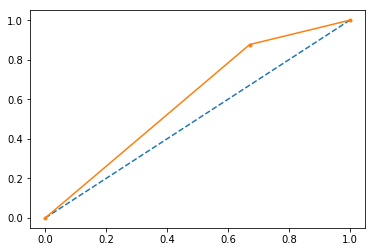

-----------------------------------

For Naive Bayes

Accuracy : 0.6435044260172842
Precision : 0.8495269286754003
Recall : 0.6450379921713102
Logloss : 12.31299032535493
AUC : 0.6418461152234355
Confusion Matrix : 
[[ 4385  2481]
 [ 7708 14007]]


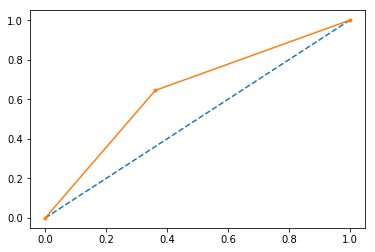

In [201]:
naive_randomf(x1_m,y1)

### Nan Removed Row Data 

In [167]:
x2=Xnr_z[['v50', 'v7', 'v4', 'v13']]
x2_c=Xcat2[['v22', 'v47', 'v52', 'v66','v38', 'v129']]
y2=y_nr

x2_m=x2.join(x2_c)


For Random Forest

Accuracy : 0.7311664239375083
Precision : 0.7964508548739972
Recall : 0.8638600808577958
Logloss : 9.285315737354491
AUC : 0.5950201691842627
Confusion Matrix : 
[[1216 2512]
 [1549 9829]]


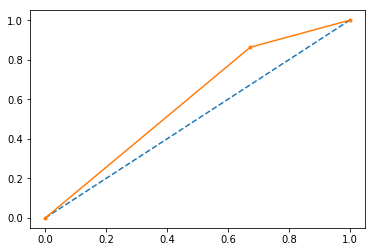

-----------------------------------

For Naive Bayes

Accuracy : 0.5853965311796637
Precision : 0.8710285797185551
Recall : 0.5276850061522236
Logloss : 14.319943559078583
AUC : 0.644609670458086
Confusion Matrix : 
[[2839  889]
 [5374 6004]]


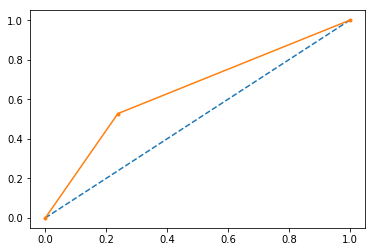

In [168]:
naive_randomf(x2_m,y2)

In [202]:
Xn_all_train,Xn_all_test,yntrain,yntest=model_selection.train_test_split(x2_m,y2,test_size=.25,random_state=11)

In [203]:
modelstats1(Xn_all_train,Xn_all_test,yntrain,yntest)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimat

{'n_neighbors': 15}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,MODELNAME,ACCURACY,PRECISION,RECALL,AUC
0,LR-train,0.754882,0.759388,0.985952,0.522206
1,LR-test,0.755660,0.761125,0.984619,0.520743
2,DecisionTree-train,1.000000,1.000000,1.000000,1.000000
3,DecisionTree-test,0.681650,0.794653,0.778520,0.582259
4,KNN(15)-train,0.757596,0.765375,0.976519,0.537152
5,KNN(15)-test,0.739971,0.757678,0.962647,0.511501
6,NB-train,0.583159,0.865540,0.526670,0.640040
7,NB-test,0.585397,0.871029,0.527685,0.644610


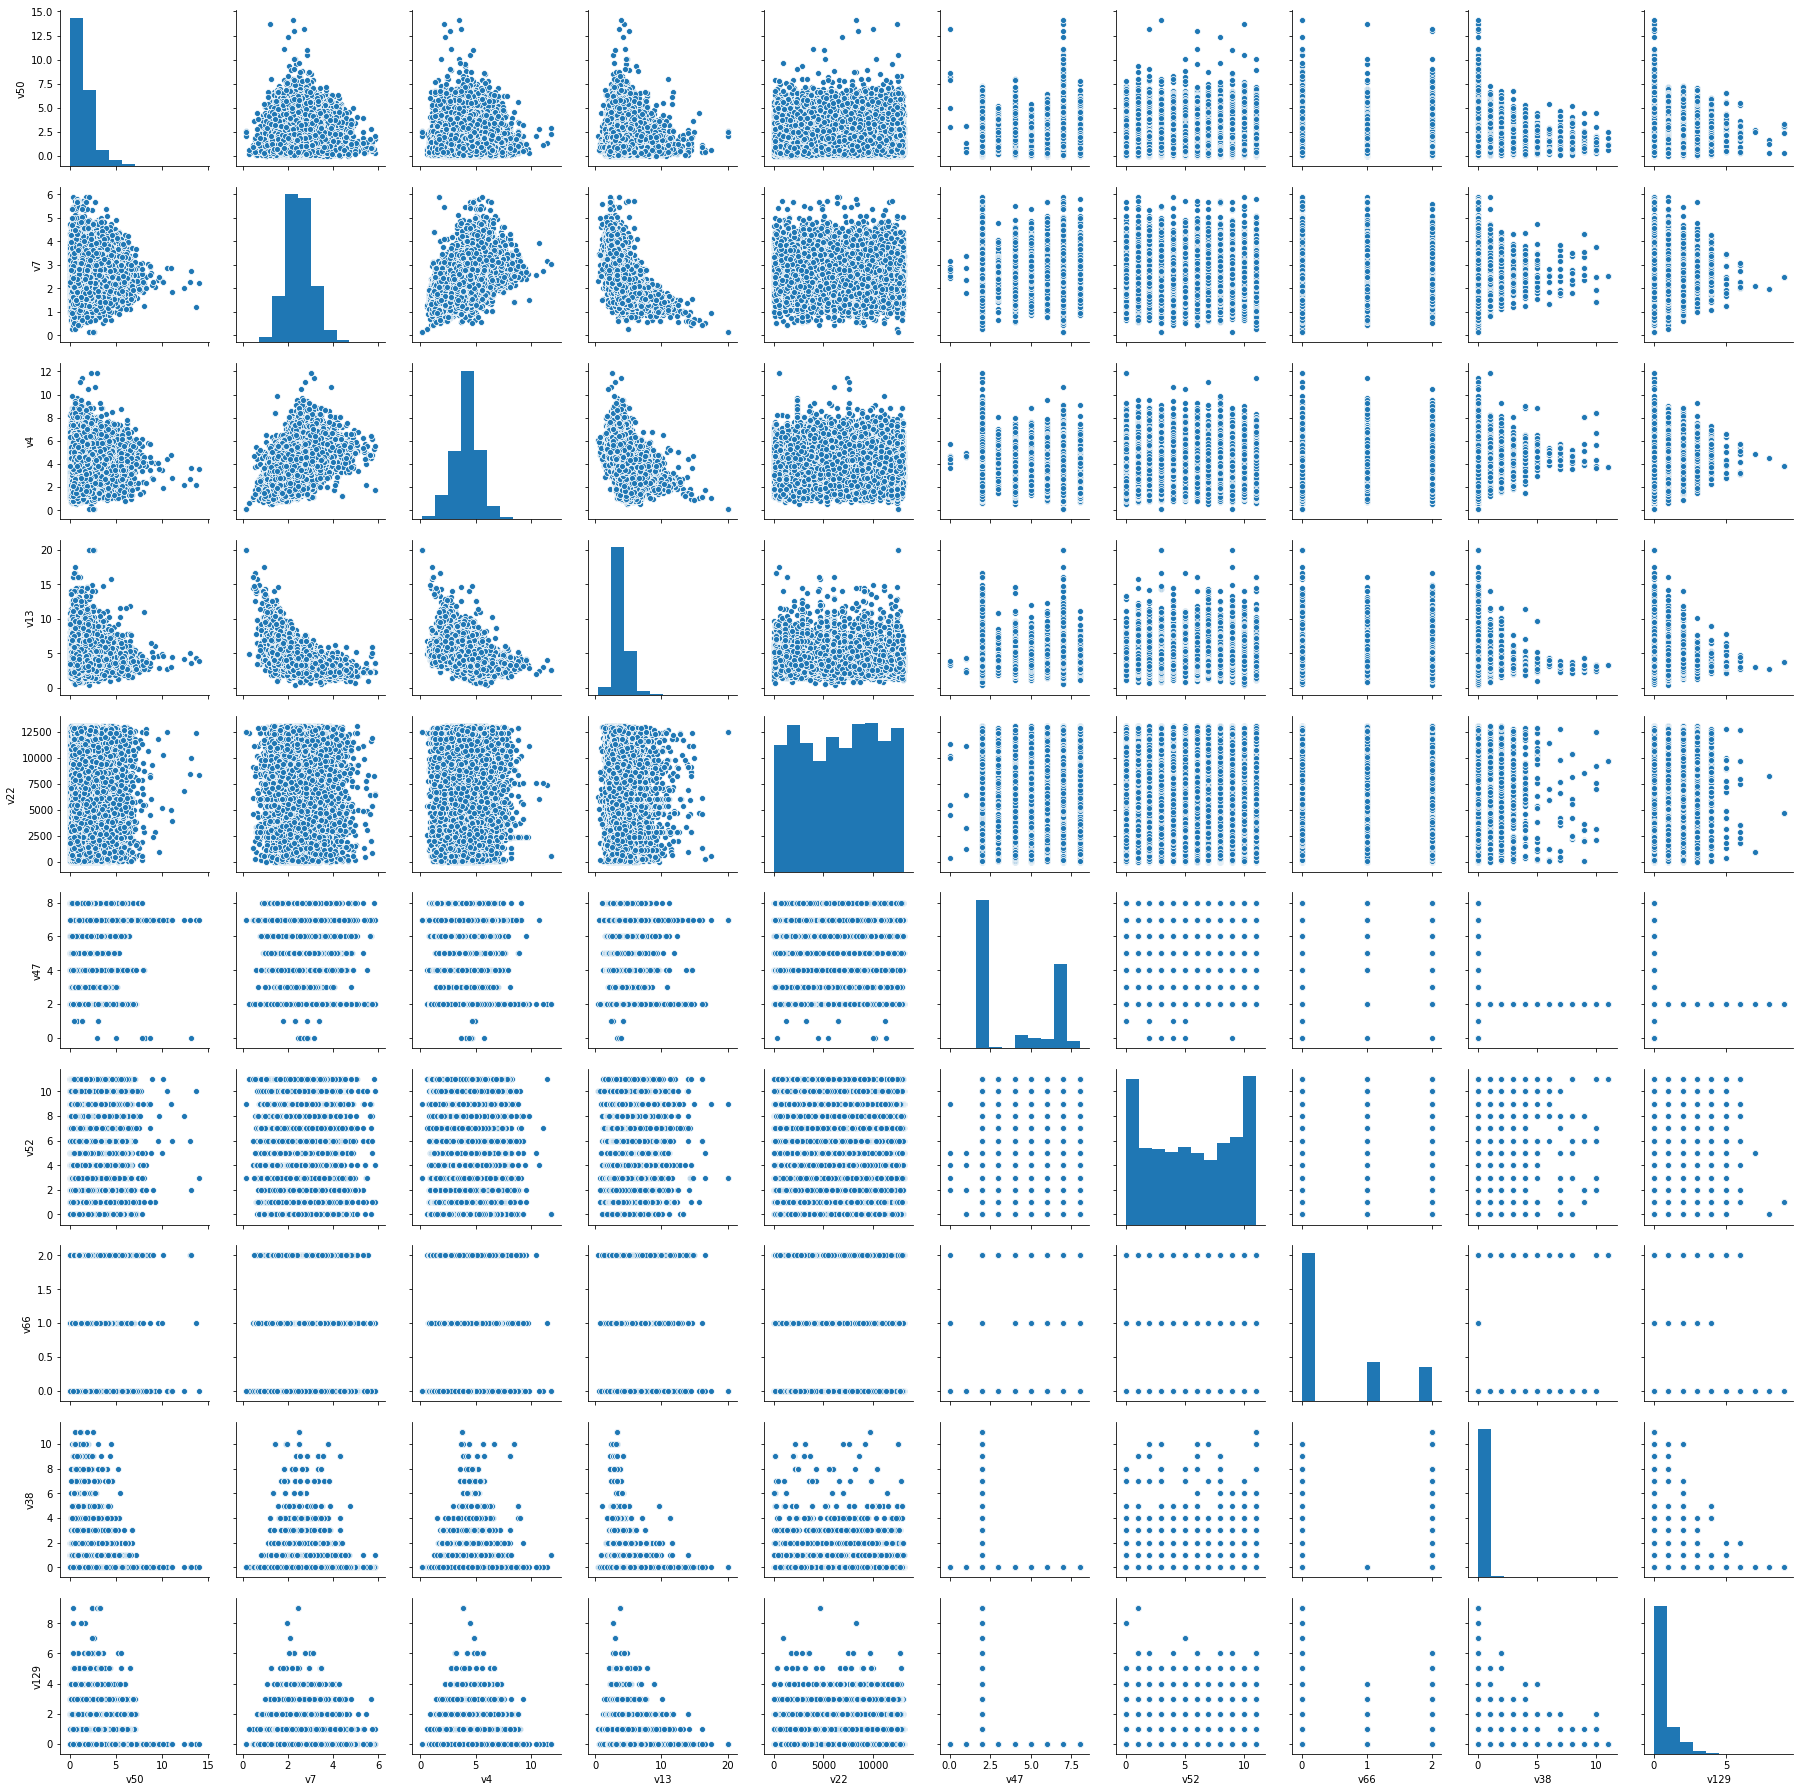

In [204]:
sns.pairplot(x2_m)